# Payment Date Prediction 


### Importing related Libraries 

In [1]:
#Importing libraries and setting the size parameter of sns plot
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

### Store the dataset into the Dataframe


In [2]:
#loading the dataset
data=pd.read_csv(r'C:\Users\KIIT\Documents\hrc project\dataset.csv')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaN,2020,2960618884,06-03-2020,20200306,20200306,20200316,CAD,RV,1,NaN,92832.27,20200306,CA10,2.960619e+09,1
50095,CA02,140106408,WAL-M corp,NaN,2020,2960618885,06-03-2020,20200306,20200306,20200316,CAD,RV,1,NaN,92832.27,20200306,CA10,2.960619e+09,1
50096,CA02,140106408,WAL-M corp,NaN,2020,2960618886,06-03-2020,20200306,20200306,20200316,CAD,RV,1,NaN,92832.27,20200306,CA10,2.960619e+09,1
50097,CA02,140106408,WAL-M corp,NaN,2020,2960618887,06-03-2020,20200306,20200306,20200316,CAD,RV,1,NaN,92832.27,20200306,CA10,2.960619e+09,1


### Check the shape of the dataframe


In [3]:
data.shape

(50099, 19)

### Check the Detail information of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### Display All the column names

In [5]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.000000,5.009900e+04,5.009900e+04,5.009900e+04,5.009900e+04,50099.0,0.0,50099.000000,5.009900e+04,5.009300e+04,50099.000000
mean,2019.307072,2.014112e+09,2.019353e+07,2.019355e+07,2.019369e+07,1.0,NaN,32456.565546,2.019355e+07,2.013216e+09,0.201581
std,0.461284,2.912992e+08,4.501712e+03,4.487779e+03,4.475909e+03,0.0,NaN,39259.249400,4.488339e+03,2.795573e+08,0.401185
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929343e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4943.480000,2.019051e+07,1.929343e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17700.000000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47385.590000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
data.isnull().mean()*100

business_code               0.000000
cust_number                 0.000000
name_customer               0.000000
clear_date                 20.158087
buisness_year               0.000000
doc_id                      0.000000
posting_date                0.000000
document_create_date        0.000000
document_create_date.1      0.000000
due_in_date                 0.000000
invoice_currency            0.000000
document type               0.000000
posting_id                  0.000000
area_business             100.000000
total_open_amount           0.000000
baseline_create_date        0.000000
cust_payment_terms          0.000000
invoice_id                  0.011976
isOpen                      0.000000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
data[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
50094,2.960619e+09,2960618884
50095,2.960619e+09,2960618885
50096,2.960619e+09,2960618886
50097,2.960619e+09,2960618887


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
data.apply(lambda x: 'Same' if x['baseline_create_date'] ==x['document_create_date'] and x['baseline_create_date']== x['document_create_date.1'] else 'Almost Same', axis=1)


0        Almost Same
1               Same
2               Same
3        Almost Same
4               Same
            ...     
50094           Same
50095           Same
50096           Same
50097           Same
50098           Same
Length: 50099, dtype: object

#### Please check, Column 'posting_id' is constant columns or not


In [11]:
data.posting_id.nunique()

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
data.isOpen.nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
data.drop(columns = ['area_business','posting_id','invoice_id','document type','document_create_date','document_create_date.1','isOpen'],axis=1,inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [15]:
data[data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8
49991,U001,200704045,RA trust,25-10-2019 00:00,2019,1930001131,10-10-2019,20191025,USD,73002.24,20191010,NAA8


### Display the Number of Duplicate Rows

In [16]:
data.duplicated().sum()

1162

### Drop all the Duplicate Rows

In [17]:
data.drop_duplicates(inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [18]:
data.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [19]:
data.shape

(48937, 12)

### Find out the total count of null values in each columns

In [20]:
data.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [21]:
data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [22]:
data.dtypes[['clear_date','posting_date','due_in_date','baseline_create_date']]

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
data['due_in_date']=pd.to_datetime(data['due_in_date'] , format='%Y%m%d')
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'] , format='%Y%m%d')
data['clear_date']=pd.to_datetime(data['clear_date'])
data['posting_date']=pd.to_datetime(data['posting_date'])

### Please check the datatype of all the columns after conversion of the above 4 columns

In [24]:
data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [25]:
data['invoice_currency'].value_counts()

USD    45011
CAD     3926
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [26]:
data[['total_open_amount']]

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
50094,92832.27
50095,92832.27
50096,92832.27
50097,92832.27


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [27]:
data['converted_usd']=np.where(data['invoice_currency']=='CAD',0.7*data.total_open_amount,data.total_open_amount)
data['converted_usd'] = data['converted_usd'].round(decimals = 2)

### Display the new "converted_usd" column values

In [28]:
data[['invoice_currency','total_open_amount','converted_usd']].head(50)

,invoice_currency,total_open_amount,converted_usd
0,USD,54273.28,54273.28
1,USD,79656.60,79656.60
2,USD,2253.86,2253.86
3,CAD,3299.70,2309.79
4,USD,33133.29,33133.29
5,CAD,22225.84,15558.09
6,USD,7358.49,7358.49
7,USD,11173.02,11173.02
8,USD,15995.04,15995.04
9,USD,28.63,28.63


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [29]:
data['buisness_year'].value_counts()

2019    33975
2020    14962
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [30]:
data.drop(columns=['invoice_currency','total_open_amount'],inplace=True,axis=1)

### Write a code to check the number of columns in dataframe

In [31]:
len(data.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [32]:
data.isna().any()[lambda x: x]

clear_date    True
dtype: bool

#### Find out the number of null values from the column that you got from the above code

In [33]:
data['clear_date'].isna().sum()

9779

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [34]:
data2=data[data['clear_date'].isnull()].copy()
data1=data[data['clear_date'].notnull()].copy()

### Check the number of Rows and Columns for both the dataframes 

In [35]:
data1.shape

(39158, 11)

In [36]:
data2.shape

(9779, 11)

### Display the 5 records from maindata and nulldata dataframes

In [37]:
data1.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.09


In [38]:
data2.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [39]:
data1['Delay']=data1['clear_date']-data1['due_in_date']
data1[['Delay']]

,Delay
0,266 days
1,-3 days
2,92 days
4,-3 days
5,-175 days
...,...
49994,0 days
49996,-174 days
49997,59 days
49998,0 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [40]:
avgdelay=data1.groupby('name_customer')['Delay'].mean(numeric_only=False)
avgdelay

name_customer
11078 us               -69 days +00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                    16 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us              -83 days +00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [41]:
data1['avg_delay']=data1['name_customer'].map(avgdelay)
data1[['avg_delay']]

,avg_delay
0,3 days 00:38:22.665121668
1,25 days 00:00:00
2,26 days 21:49:05.454545454
4,4 days 19:33:27.692307692
5,51 days 18:40:00
...,...
49994,-10 days +04:15:00
49996,-2 days +13:29:40.782918150
49997,2 days 11:25:42.857142857
49998,20 days 17:00:53.731343283


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [42]:
data1['avg_delay'] = data1['avg_delay'].dt.total_seconds()
data1['avg_delay'] = data1['avg_delay'].astype(np.int64)
data1[['avg_delay']]

,avg_delay
0,261502
1,2160000
2,2324945
4,416007
5,4473600
...,...
49994,-848700
49996,-124219
49997,213942
49998,1789253


### Display the maindata dataframe 

In [43]:
data1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,266 days,261502
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,-3 days,2160000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,92 days,2324945
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-3 days,416007
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.09,-175 days,4473600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.40,0 days,-848700
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54,-174 days,-124219
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.86,59 days,213942
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.48,0 days,1789253


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [44]:
data1.drop(columns=['Delay','clear_date'],inplace=True,axis=1)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [45]:
y=data1.iloc[:,-1:]

In [46]:
X= data1.iloc[:,:10]

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [47]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X,y,test_size=0.4,random_state=0)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [48]:
print(X_train.shape) 
print(X_loc_test.shape) 
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494, 1)
(15664, 1)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [49]:
X_val,X_test,y_val,y_test = train_test_split(X_loc_test,y_loc_test,test_size=0.5,random_state=0 , shuffle = False)

### Please check for the number of rows and columns of all the 4 dataframes 

In [50]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832, 1)
(7832, 1)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

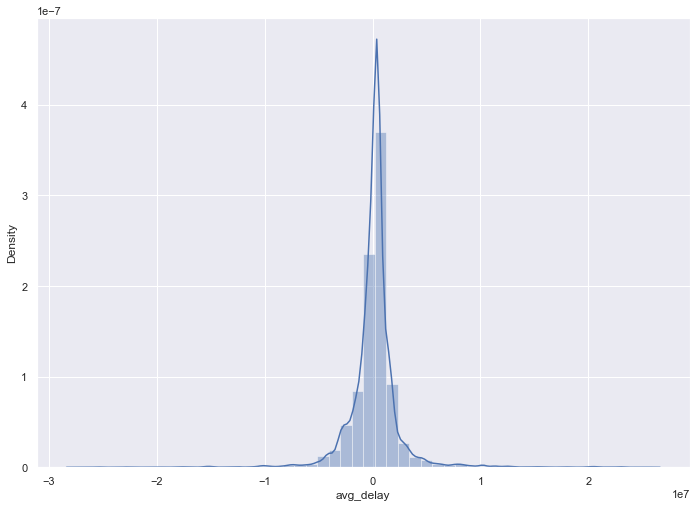

In [51]:
sns.distplot(data1['avg_delay'], bins=50)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [52]:
new_data=xtrain_grp = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

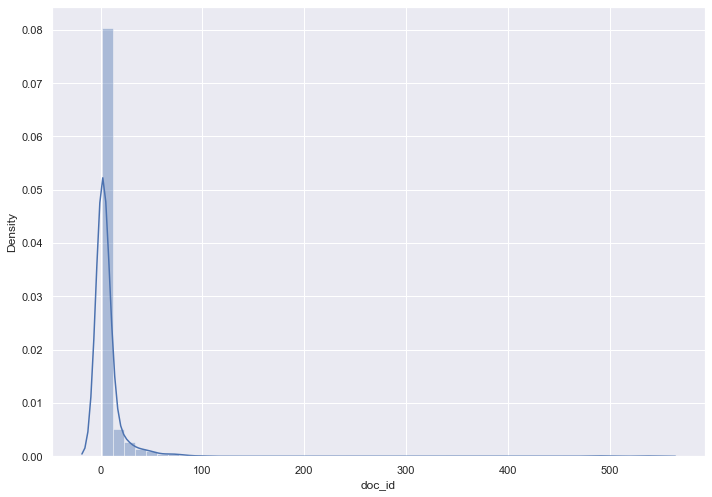

In [53]:
sns.distplot(xtrain_grp['doc_id'] , bins=50)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='count'>

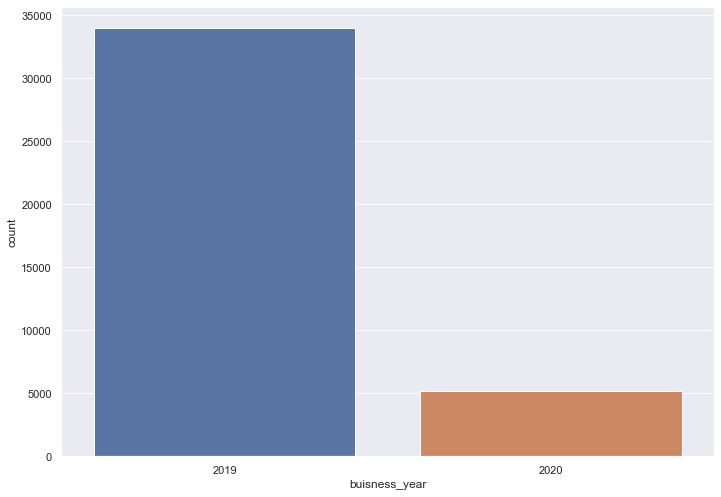

In [54]:
sns.countplot(data= data1 , x = 'buisness_year')

<AxesSubplot:xlabel='buisness_year', ylabel='doc_id'>

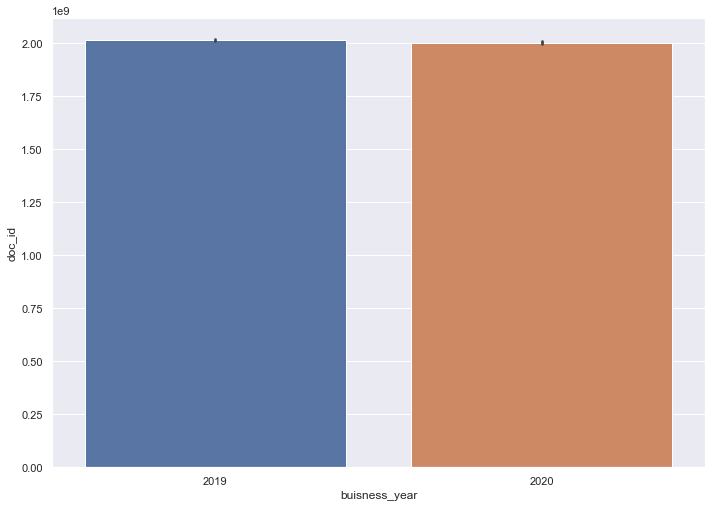

In [55]:
sns.barplot(x ='buisness_year',y='doc_id', data = data1)

# Feature Engineering 

### Display and describe the X_train dataframe 

In [56]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
45718,U001,200794332,COST foundation,2020,1930448249,2020-01-28,2020-02-12,2020-01-28,NAAX,36273.03
17966,U001,200706844,WINC trust,2020,1930517131,2020-02-13,2020-02-28,2020-02-13,NAA8,6349.27
21322,U001,200803720,DEC us,2019,1928589714,2019-08-01,2019-01-24,2019-01-01,NAM4,282.84
38919,U001,200752302,KROGER,2020,1930508809,2020-12-02,2020-02-27,2020-02-12,NAA8,64749.18
25191,U001,200974851,RESTA co,2019,1929483483,2019-12-06,2019-06-27,2019-06-12,NAA8,2066.63
...,...,...,...,...,...,...,...,...,...,...
26152,U001,200769623,WAL-MAR associates,2019,1930152454,2019-11-14,2019-11-29,2019-11-14,NAH4,3449.63
40790,U001,200793568,SUPE in,2019,1930222273,2019-06-12,2019-12-21,2019-12-06,NAA8,40591.75
38558,U001,100036066,GROC associates,2019,1929174676,2019-04-22,2019-05-07,2019-04-22,NAA8,24869.32
26776,U001,200769623,WAL-MAR associates,2019,1929555422,2019-06-28,2019-07-13,2019-06-28,NAH4,42362.89


In [57]:
X_train.describe()
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
45718,U001,200794332,COST foundation,2020,1930448249,2020-01-28,2020-02-12,2020-01-28,NAAX,36273.03
17966,U001,200706844,WINC trust,2020,1930517131,2020-02-13,2020-02-28,2020-02-13,NAA8,6349.27
21322,U001,200803720,DEC us,2019,1928589714,2019-08-01,2019-01-24,2019-01-01,NAM4,282.84
38919,U001,200752302,KROGER,2020,1930508809,2020-12-02,2020-02-27,2020-02-12,NAA8,64749.18
25191,U001,200974851,RESTA co,2019,1929483483,2019-12-06,2019-06-27,2019-06-12,NAA8,2066.63


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [58]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [59]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code']).astype(np.int64)

In [60]:
X_val['business_code_enc'] = business_coder. transform(X_val['business_code']).astype(np.int64)
X_test['business_code_enc'] = business_coder. transform(X_test['business_code']).astype(np.int64)

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [61]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
45718,U001,1
17966,U001,1
21322,U001,1
38919,U001,1
25191,U001,1
...,...,...
26152,U001,1
40790,U001,1
38558,U001,1
26776,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [62]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [63]:
 X_train ,X_val, X_test= custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [64]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(np.int64)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(np.int64)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(np.int64)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [65]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [66]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer']).astype(np.int64)
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer']).astype(np.int64)
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer']).astype(np.int64)

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [67]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [68]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms']).astype(np.int64)
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms']).astype(np.int64)
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms']).astype(np.int64)

In [69]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [70]:
X_train.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [71]:
X_val.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [72]:
X_test.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [73]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [74]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [75]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_creategdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [76]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [77]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [79]:
print(X_train.dtypes)
print(X_val.dtypes)
print(X_test.dtypes)

cust_number                 int64
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_creategdate        int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object
cust_number                 int64
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64


# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [80]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [81]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [82]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [83]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [84]:
train=X_train.copy()
handling_correlation(train.copy(),.85)

['day_of_createdate',
 'month_of_due',
 'year_of_createdate',
 'year_of_due',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

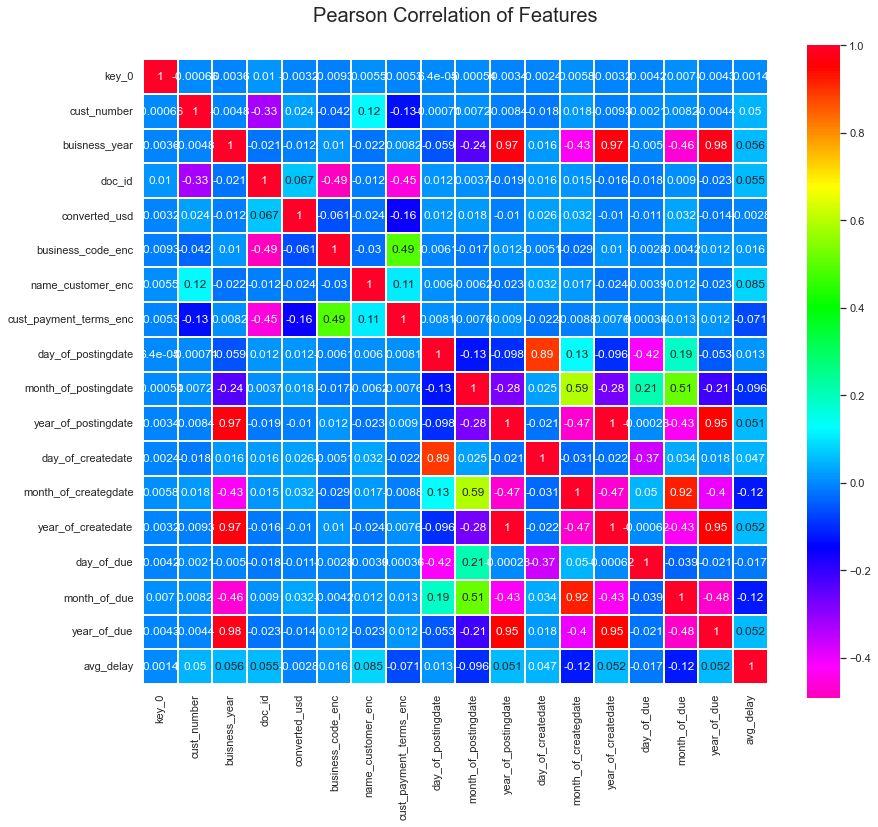

In [85]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [86]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [87]:
sel.variances_

array([1.81954912e+15, 1.14757386e-01, 8.74254278e+16, 1.34173150e+09,
       2.87927752e-01, 1.07015118e+06, 1.35481309e+02, 8.17239551e+01,
       1.19389088e+01, 1.14798749e-01, 7.70243713e+01, 1.22619699e+01,
       1.14937418e-01, 7.66173615e+01, 1.20665594e+01, 1.18125269e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [88]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [89]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [90]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [91]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2361646.7664774493

### Display The Comparison Lists

In [92]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[5480876732197.517],[0.0493798303788906],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [93]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegressor')
regressor_svr = SVR()
regressor_svr.fit(X_train, y_train)
predicted = regressor_svr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [94]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [95]:
predict_test= regressor_svr.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2419272.615581172

### Display The Comparison Lists

In [96]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor'],[5480876732197.517, 5774463747990.069],[0.0493798303788906, -0.0015408073927551946],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')

regressor_dtr = DecisionTreeRegressor()
regressor_dtr.fit(X_train, y_train)
predicted =  regressor_dtr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_test= regressor_dtr.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3191520.224078979

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor'],[5480876732197.517, 5774463747990.069, 10124200548022.088],[0.0493798303788906, -0.0015408073927551946, -0.7559725774712154],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor_rfr = RandomForestRegressor()
regressor_rfr.fit(X_train, y_train)
predicted =  regressor_rfr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test= regressor_rfr.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2114411.0672157635

### Display The Comparison Lists


In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor'],[5480876732197.517, 5774463747990.069, 10124200548022.088, 4653575483808.11],[0.0493798303788906, -0.0015408073927551946, -0.7559725774712154, 0.19286951122715368],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [105]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2150802.5222711107

### Display The Comparison Lists


In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[5480876732197.517, 5774463747990.069, 10124200548022.088, 4653575483808.11, 4549420148367.38],[0.0493798303788906, -0.0015408073927551946, -0.7559725774712154, 0.19286951122715368, 0.21093453393820316],

## You need to make the comparison list into a comparison dataframe 

In [109]:
comparision_df = pd.DataFrame( {'Algorithm': Algorithm,
     'MSE_Score': MSE_Score,
     'R2_Score': R2_Score})


comparision_df

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,5.480877e+12,0.049380
1,SupportVectorRegressor,5.774464e+12,-0.001541
2,DecisionTreeRegressor,1.012420e+13,-0.755973
3,RandomForestRegressor,4.653575e+12,0.192870
4,XGB Regressor,4.549420e+12,0.210935


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [110]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [111]:
mean_squared_error(y_test,predictedfinal,squared=False)

2132936.9771203697

### Calculate the mean Square Error for validation dataset

In [112]:
mean_squared_error(y_val, predict_testfinal, squared=False)

2150802.5222711107

### Calculate the R2 score for test

In [113]:
(r2_score(y_test, predictedfinal))

0.21093453393820316

### Calculate the R2 score for Validation

In [114]:
r2_score(y_val, predict_testfinal)

0.2067356622007236

### Calculate the Accuracy for train Dataset 

In [115]:
regressorfinal.score(X_train, y_train)*100

65.35265975297474

### Calculate the accuracy for validation

In [116]:
regressorfinal.score(X_val, y_val)*100

20.67356622007236

### Calculate the accuracy for test

In [117]:
regressorfinal.score(X_test, y_test)*100

21.093453393820315

## Specify the reason behind choosing your machine learning model 

- The Model that I chose is XgBoost as it has a good R2 score with less MSE as compared to others.
- As we know higher the R2 Score better is the model's performance and also with this model there is neither a situation of overfitting nor underfitting. The score difference is quite less between the train , test and validation sets. 

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [118]:
data2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


### Check for the number of rows and columns in the nulldata

In [119]:
data2.shape 

(9779, 11)

### Check the Description and Information of the nulldata 

In [120]:
data2.describe()

,buisness_year,doc_id,converted_usd
count,9779.0,9.779000e+03,9779.000000
mean,2020.0,2.015730e+09,32395.557067
std,0.0,2.824983e+08,35393.870874
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930660e+09,5731.950000
50%,2020.0,1.930732e+09,19403.930000
75%,2020.0,1.930821e+09,48806.640000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [121]:
nulldata1 = data2.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [122]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(data2['business_code'])
data2['business_code_enc'] = business_codern.transform(data2['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [123]:
data2['cust_number'] = data2['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(np.int64)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [124]:
data2['day_of_cleardate'] = data2['clear_date'].dt.day
data2['month_of_cleardate'] = data2['clear_date'].dt.month
data2['year_of_cleardate'] = data2['clear_date'].dt.year


data2['day_of_postingdate'] = data2['posting_date'].dt.day
data2['month_of_postingdate'] = data2['posting_date'].dt.month
data2['year_of_postingdate'] = data2['posting_date'].dt.year


data2['day_of_due'] = data2['due_in_date'].dt.day
data2['month_of_due'] = data2['due_in_date'].dt.month
data2['year_of_due'] = data2['due_in_date'].dt.year


data2['day_of_createdate'] = data2['baseline_create_date'].dt.day
data2['month_of_createdate'] = data2['baseline_create_date'].dt.month
data2['year_of_createdate'] = data2['baseline_create_date'].dt.year


### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [125]:
data2['cust_payment_terms_enc']=label_encoder1.transform(data2['cust_payment_terms']).astype(np.int64)
data2['business_code_enc']=label_encoder1.transform(data2['business_code']).astype(np.int64)
data2['name_customer_enc']=label_encoder.transform(data2['name_customer']).astype(np.int64)


### Check for the datatypes of all the columns of Nulldata

In [126]:
data2.dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [127]:
data2.drop(columns=['business_code',
"baseline_create_date",
"due_in_date",
"posting_date",
"name_customer",
"clear_date",
"cust_payment_terms",
'day_of_cleardate',
"month_of_cleardate",
"year_of_cleardate"], axis=1, inplace=True)

### Check the information of the "nulldata" dataframe

In [128]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int64  
 1   buisness_year           9779 non-null   int64  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int64  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_due              9779 non-null   int64  
 9   month_of_due            9779 non-null   int64  
 10  year_of_due             9779 non-null   int64  
 11  day_of_createdate       9779 non-null   int64  
 12  month_of_createdate     9779 non-null   int64  
 13  year_of_createdate      9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [129]:
print(data2.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int64  
 1   buisness_year           9779 non-null   int64  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int64  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_due              9779 non-null   int64  
 9   month_of_due            9779 non-null   int64  
 10  year_of_due             9779 non-null   int64  
 11  day_of_createdate       9779 non-null   int64  
 12  month_of_createdate     9779 non-null   int64  
 13  year_of_createdate      9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [130]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [131]:
data2.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [132]:
nulldata2=data2[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [133]:
nulldata2.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2960623488,2309.79,66,2714,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1930659387,11173.02,66,2798,18,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1930610806,3525.59,66,89,18,3,11,2020,11,3,2020,26,3,2020
14,200739534,2020,1930788296,121105.65,66,2043,18,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1930817482,3726.06,66,733,34,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [134]:
final_result =  regressor_rfr.predict(data2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [135]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [136]:
final_result.head()

0   -2643307.97
1   -2536823.63
2   -7409198.41
3   -6572133.63
4   -8160898.23
Name: avg_delay, dtype: float64

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [137]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = data2.index )

### Display the "Final" dataframe 

In [138]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,-2643307.97
1,7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,-2536823.63
2,10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59,-7409198.41
3,14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,-6572133.63
4,15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-8160898.23


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [139]:
Final.shape

(9779, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [140]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [141]:
Final['clear_date'].head(15)

0    2020-03-10 09:44:52.030
1    2020-03-04 15:19:36.370
2    2019-12-31 05:53:21.590
3    2020-02-13 22:24:26.370
4    2020-01-22 13:05:01.770
5    2020-03-09 15:15:15.690
6    2020-01-25 22:11:47.410
7    2020-02-07 04:20:54.590
8    2020-02-22 04:56:13.350
9    2020-02-22 13:09:57.710
10   2020-01-31 10:01:15.270
11   2020-01-13 18:19:58.690
12   2020-04-24 23:17:15.220
13   2020-01-30 07:21:45.030
14   2020-02-28 20:29:10.490
Name: clear_date, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [142]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [143]:
Final['avg_delay'].head(15)

0    -31.0
1    -30.0
2    -86.0
3    -77.0
4    -95.0
5    -27.0
6    -51.0
7    -39.0
8    -60.0
9    -76.0
10   -68.0
11   -75.0
12   -30.0
13   -57.0
14   -42.0
Name: avg_delay, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [144]:

bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [145]:
Final.drop(columns = ['key_0', 'avg_delay'], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [146]:
Final['Aging Bucket'].value_counts()

0-15               108
16-30               13
31-45                5
46-60                0
Greatar than 60      0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [147]:
Final.head(15)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-03-10 09:44:52.030,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,NaN
1,U001,200744019,TARG us,2020-03-04 15:19:36.370,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,NaN
2,U001,200418007,AM,2019-12-31 05:53:21.590,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59,NaN
3,U001,200739534,OK systems,2020-02-13 22:24:26.370,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,NaN
4,U001,200353024,DECA corporation,2020-01-22 13:05:01.770,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
5,U001,200744019,TARG associates,2020-03-09 15:15:15.690,2020,1930676042,2020-03-21,2020-04-05,2020-03-21,NAA8,5893.01,NaN
6,CA02,140106408,WAL-M corp,2020-01-25 22:11:47.410,2020,2960618790,2020-06-03,2020-03-16,2020-03-06,CA10,64982.59,NaN
7,U001,200337148,COAS llc,2020-02-07 04:20:54.590,2020,1930592246,2020-02-03,2020-03-17,2020-03-02,NAA8,11380.83,NaN
8,U001,200794332,COST associates,2020-02-22 04:56:13.350,2020,1930731070,2020-07-04,2020-04-22,2020-04-07,NAAX,3863.93,NaN
9,U001,200794332,COST llc,2020-02-22 13:09:57.710,2020,1930803605,2020-04-23,2020-05-08,2020-04-23,NAAX,74453.01,NaN


### Store this dataframe into the .csv format

In [148]:
filename='model.sav';
pickle.dump(regressorfinal, open(filename, 'wb'))
Final.to_csv('final.csv')

# END OF THE PROJECT